In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
#import warnings
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Set path for csv
path= "Resources/netflix_titles.csv"

In [3]:
#Read csv into notebook
netflix = pd.read_csv(path)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
#Created new dataframe pulling only data needed for this task
netflix_release_genre = netflix[["title", "type", "release_year", "listed_in"]]
netflix_release_genre.head()

,title,type,release_year,listed_in
0,3%,TV Show,2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,7:19,Movie,2016,"Dramas, International Movies"
2,23:59,Movie,2011,"Horror Movies, International Movies"
3,9,Movie,2009,"Action & Adventure, Independent Movies, Sci-Fi..."
4,21,Movie,2008,Dramas


In [5]:
#Sorted dataframe to only show movies that were released int 2020
netflix_2020 = netflix_release_genre.loc[(netflix_release_genre['release_year'] == 2020) & (netflix_release_genre['type'] == "Movie")]
netflix_2020.head()

,title,type,release_year,listed_in
27,#Alive,Movie,2020,"Horror Movies, International Movies, Thrillers"
30,#cats_the_mewvie,Movie,2020,"Documentaries, International Movies"
32,#FriendButMarried 2,Movie,2020,"Dramas, International Movies, Romantic Movies"
43,Òlòtūré,Movie,2020,"Dramas, International Movies"
57,100% Halal,Movie,2020,"Dramas, International Movies"


In [6]:
#Split the listed_in column on the ", " and stored each split in a new column per row
new = netflix_2020['listed_in'].str.split(", ", n = 2, expand=True)
#new = netflix_2020.loc[:,('listed_in')].str.split(", ", n = 2, expand=True)
netflix_2020['genre_1'] = new[0]
#netflix_2020.loc[:,('genre_1')] = new[0]
netflix_2020['genre_2'] = new[1]
netflix_2020['genre_3'] = new[2]
netflix_2020.drop(columns=['listed_in'], inplace=True)

netflix_2020.head()

<ipython-input-6-dfa4647d4b16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_2020['genre_1'] = new[0]
<ipython-input-6-dfa4647d4b16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_2020['genre_2'] = new[1]
<ipython-input-6-dfa4647d4b16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,title,type,release_year,genre_1,genre_2,genre_3
27,#Alive,Movie,2020,Horror Movies,International Movies,Thrillers
30,#cats_the_mewvie,Movie,2020,Documentaries,International Movies,None
32,#FriendButMarried 2,Movie,2020,Dramas,International Movies,Romantic Movies
43,Òlòtūré,Movie,2020,Dramas,International Movies,None
57,100% Halal,Movie,2020,Dramas,International Movies,None


In [7]:
#Removed "None" and "Movies" as it was either data not needed or bad data
unwanted = {None, 'Movies'}
movie_type_1 = (netflix_2020['genre_1'])
movie_type_1 = [x for x in movie_type_1 if x not in unwanted]
movie_type_2 = (netflix_2020['genre_2'])
movie_type_2 = [x for x in movie_type_2 if x not in unwanted]
movie_type_3 = (netflix_2020['genre_3'])
movie_type_3 = [x for x in movie_type_3 if x not in unwanted]


In [8]:
print(len(movie_type_1))
print(len(movie_type_2))
print(len(movie_type_3))

409
284
132


In [9]:
#Created a list to store the genre/categories from first genre column
movie_type = set(movie_type_1)
genres = list(movie_type)
#Added genres from the 2nd and 3rd column while removing duplicates
genres.extend(genre for genre in movie_type_2 if genre not in genres)
genres.extend(genre for genre in movie_type_3 if genre not in genres)

genres

['Music & Musicals',
 'Horror Movies',
 'Stand-Up Comedy',
 'Children & Family Movies',
 'Action & Adventure',
 'Thrillers',
 'Anime Features',
 'Independent Movies',
 'Dramas',
 'Documentaries',
 'International Movies',
 'Comedies',
 'Romantic Movies',
 'LGBTQ Movies',
 'Sports Movies',
 'Sci-Fi & Fantasy',
 'Faith & Spirituality']

In [10]:
#Created dictionary without values to hold count results
genre_dict = {'Comedies' : None,
 'International Movies' : None,
 'Anime Features' : None,
 'Independent Movies' : None,
 'Documentaries' : None,
 'Music & Musicals' : None,
 'Action & Adventure' : None,
 'Thrillers' : None,
 'Stand-Up Comedy' : None,
 'Children & Family Movies' : None,
 'Dramas' : None,
 'Horror Movies' : None,
 'Romantic Movies' : None,
 'LGBTQ Movies' : None,
 'Sports Movies' : None,
 'Sci-Fi & Fantasy' : None,
 'Faith & Spirituality' : None}

In [11]:
#Used for loop to iderate through the dataframe and count how many times each genre appeared
for genre in genre_dict:

  g_count = netflix_2020[netflix_2020 == genre].count()
  genre_dict[genre] = g_count
 

In [12]:
genre_dict

{'Comedies': title            0
 type             0
 release_year     0
 genre_1         71
 genre_2         38
 genre_3          1
 dtype: int64,
 'International Movies': title             0
 type              0
 release_year      0
 genre_1           9
 genre_2         120
 genre_3          32
 dtype: int64,
 'Anime Features': title           0
 type            0
 release_year    0
 genre_1         1
 genre_2         2
 genre_3         0
 dtype: int64,
 'Independent Movies': title            0
 type             0
 release_year     0
 genre_1          1
 genre_2         23
 genre_3         11
 dtype: int64,
 'Documentaries': title            0
 type             0
 release_year     0
 genre_1         57
 genre_2          2
 genre_3          0
 dtype: int64,
 'Music & Musicals': title            0
 type             0
 release_year     0
 genre_1          3
 genre_2         13
 genre_3         11
 dtype: int64,
 'Action & Adventure': title            0
 type             0
 release_year  

In [13]:
#created a new dataframe from the genre dictionary previously created
genre_counts_df = pd.DataFrame(genre_dict).T

genre_counts_df

,title,type,release_year,genre_1,genre_2,genre_3
Comedies,0,0,0,71,38,1
International Movies,0,0,0,9,120,32
Anime Features,0,0,0,1,2,0
Independent Movies,0,0,0,1,23,11
Documentaries,0,0,0,57,2,0
Music & Musicals,0,0,0,3,13,11
Action & Adventure,0,0,0,38,0,0
Thrillers,0,0,0,3,12,20
Stand-Up Comedy,0,0,0,41,0,0
Children & Family Movies,0,0,0,76,3,0


In [14]:
#Added total column and got the sum of each genre across the three genre count columns
genre_counts_df.loc[:,'Total'] = genre_counts_df.sum(axis=1)
genre_counts_df

,title,type,release_year,genre_1,genre_2,genre_3,Total
Comedies,0,0,0,71,38,1,110
International Movies,0,0,0,9,120,32,161
Anime Features,0,0,0,1,2,0,3
Independent Movies,0,0,0,1,23,11,35
Documentaries,0,0,0,57,2,0,59
Music & Musicals,0,0,0,3,13,11,27
Action & Adventure,0,0,0,38,0,0,38
Thrillers,0,0,0,3,12,20,35
Stand-Up Comedy,0,0,0,41,0,0,41
Children & Family Movies,0,0,0,76,3,0,79


In [15]:
#Set the axes based on the needed data from the dataframe
x_axis = genre_counts_df.index
y_axis = genre_counts_df['Total']

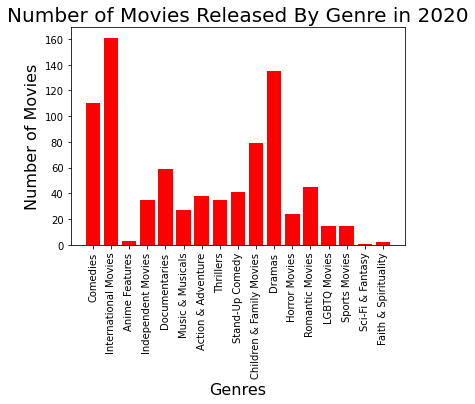

In [17]:
#Ploted a bar chart to show the results and determine which genre had the most movies released in 2020
plt.bar(x_axis, y_axis, color='r')
plt.xticks(rotation='vertical')

plt.title("Number of Movies Released By Genre in 2020", fontsize=20)
plt.xlabel("Genres", fontsize=16)
plt.ylabel("Number of Movies", fontsize=16)

plt.savefig("Images/bar_genre_release.png")
plt.show()